### Measuring model performance
1. ROC: Reveiver Operating Characteristic
2. AUC: Area Under the Curve

- Learning Date: 22-Aug-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/


In [1]:
# import libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
### Study hours example

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv'
df = pd.read_csv(url)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


<AxesSubplot: xlabel='Hours', ylabel='Pass'>

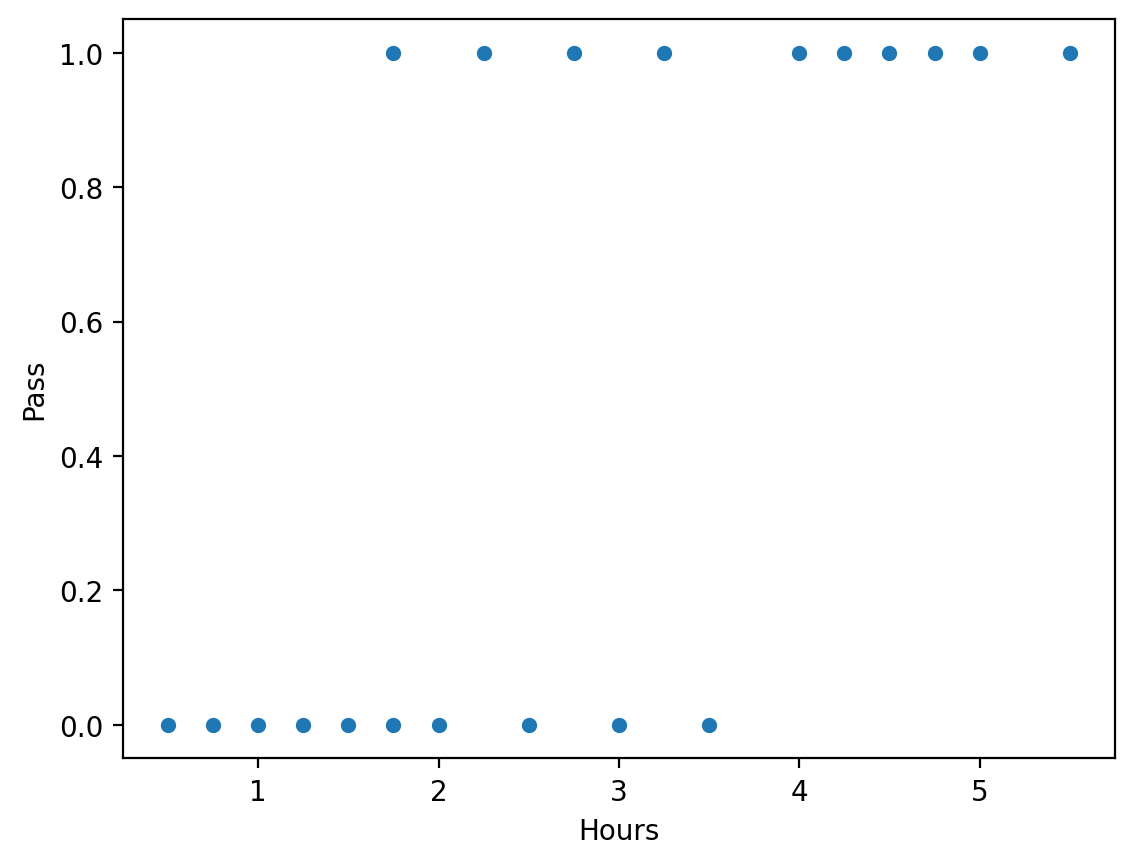

In [3]:
sns.scatterplot(data = df, x = 'Hours', y = 'Pass')

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py

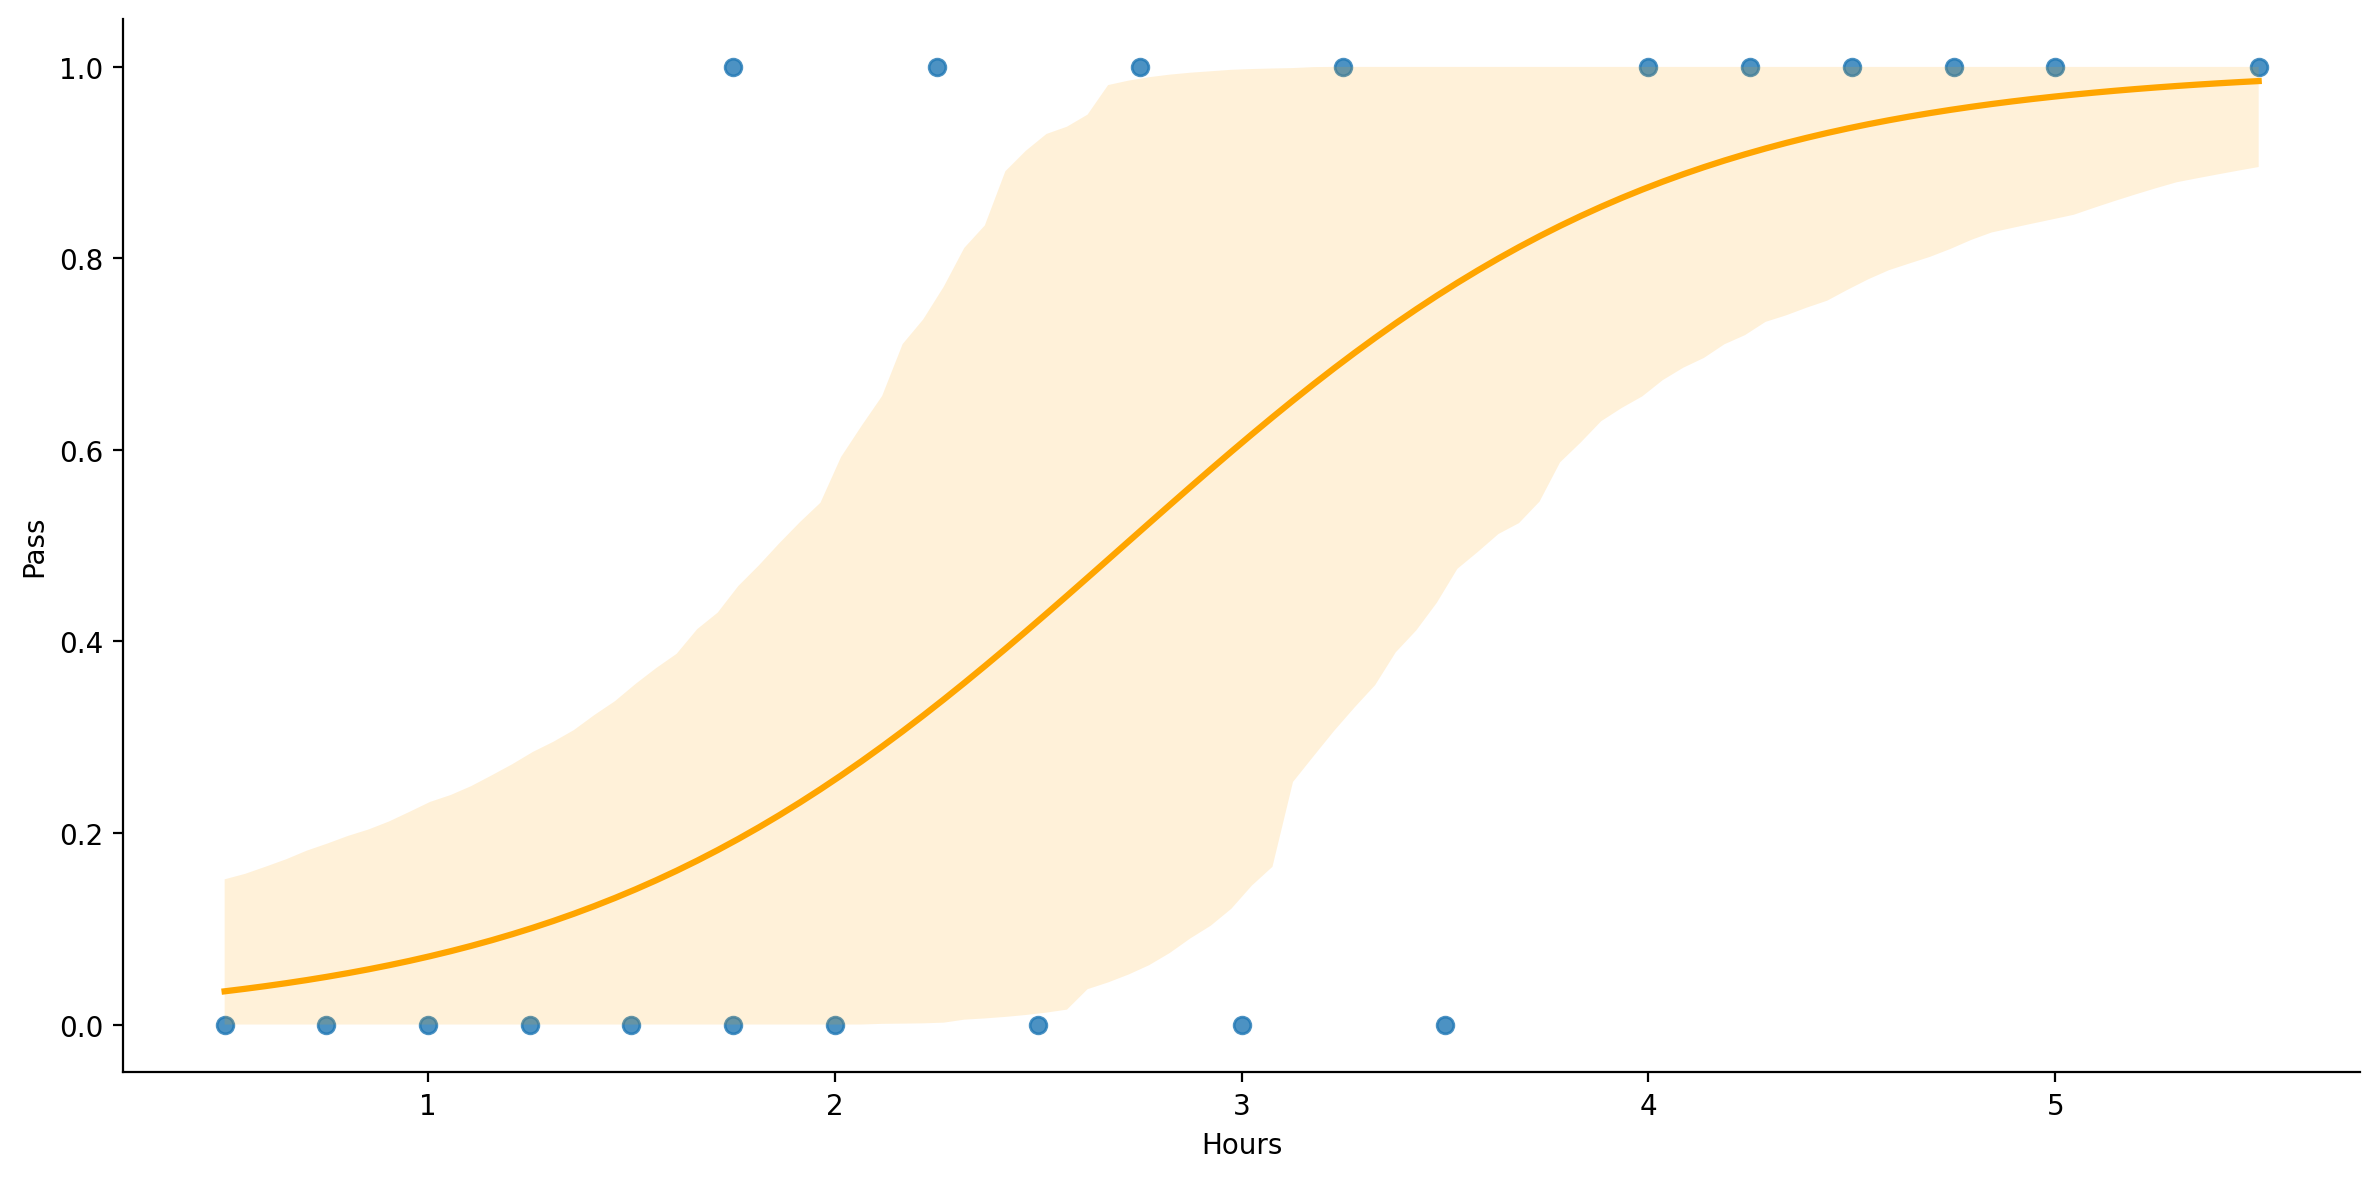

In [4]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, height = 6, aspect = 2, line_kws =  {'color': 'orange'})

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py

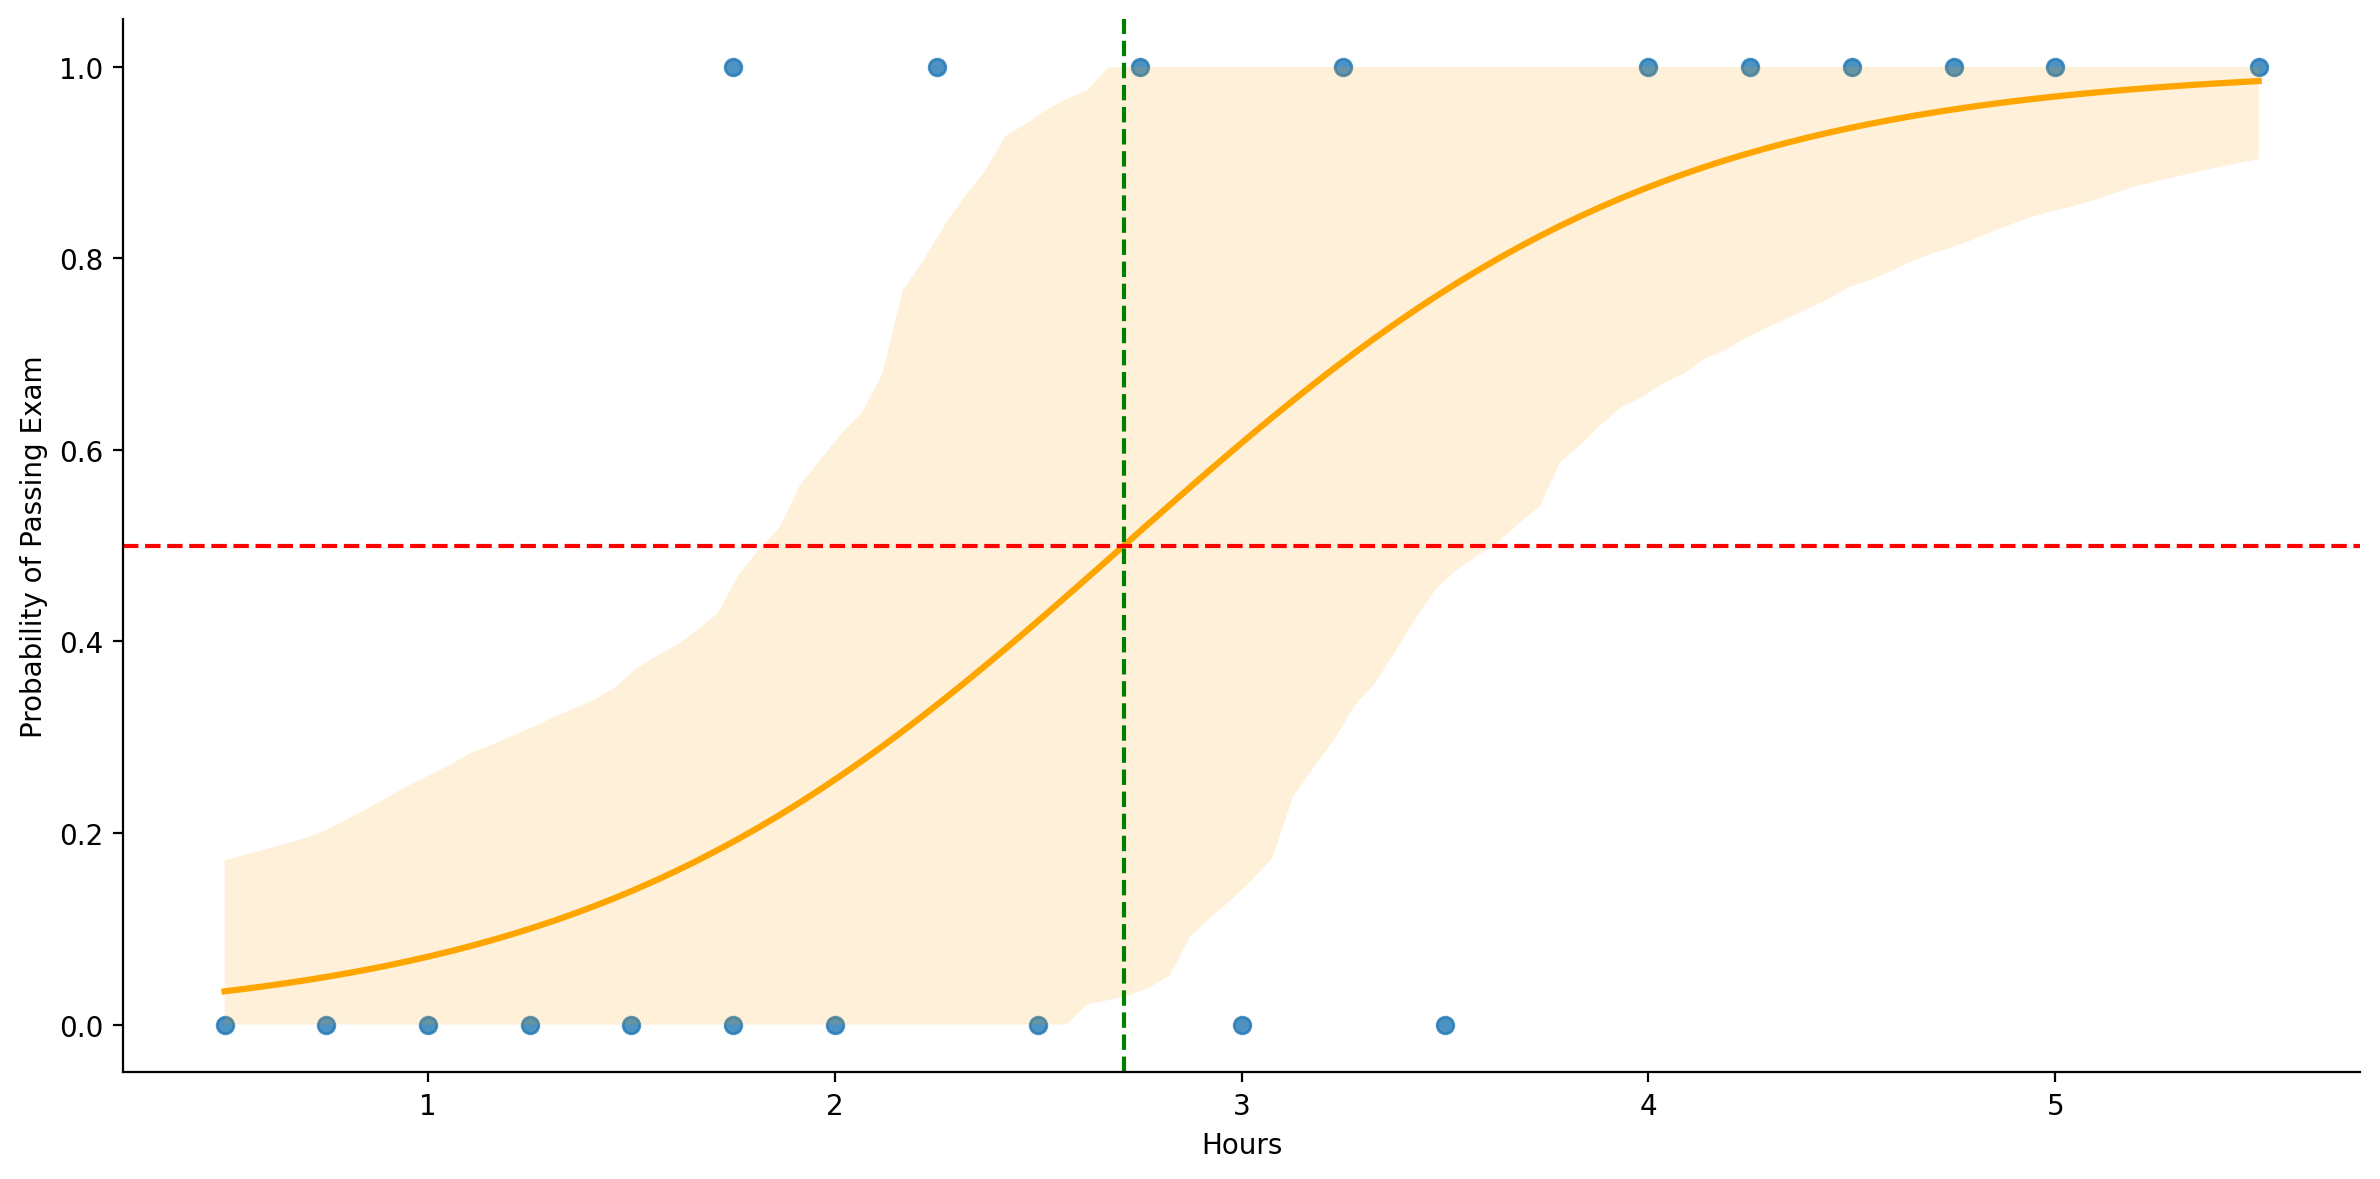

In [7]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, height = 6, aspect = 2, line_kws =  {'color': 'orange'})
plt.ylabel('Probability of Passing Exam')
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--')

### Logistic Regression

In [8]:
# import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [9]:
# split columns for X and y

X = df[['Hours']]
y = df.Pass

In [10]:
X.head()

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Pass, dtype: int64

In [13]:
# create a model

# model = LogisticRegression(solver='lbfgs') # regularization
# model = LogisticRegression(solver='liblinear') # with regularization
model = LogisticRegression(C = 1e10, solver='lbfgs') # disable regularization, similar to statsmodels result
# model = SVC()
# model = RandomForestClassifier()
model

LogisticRegression(C=10000000000.0)

In [14]:
# train a model

model.fit(X, y)

LogisticRegression(C=10000000000.0)

In [15]:
# get a score

model.score(X, y)

0.8

In [16]:
model.intercept_

array([-4.07771764])

In [17]:
model.coef_

array([[1.50464522]])

In [18]:
from IPython.display import Markdown

In [19]:
Markdown(r"$$prob = \frac{1}{1+exp^{-(%.4f x + %.4f)}}$$"%(model.coef_, model.intercept_))

/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_3561/3510302578.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Markdown(r"$$prob = \frac{1}{1+exp^{-(%.4f x + %.4f)}}$$"%(model.coef_, model.intercept_))


$$prob = \frac{1}{1+exp^{-(1.5046 x + -4.0777)}}$$

In [21]:
# predict y

y_pred = model.predict(X)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [23]:
# check how many y and y_pred are the same  value

np.sum(y.values == y_pred)

16

In [24]:
np.sum(y.values != y_pred)

4

In [25]:
model.predict_proba(X) # col 0: probability estimates of the negative, col 1: probability estimates of the positive

array([[0.96528981, 0.03471019],
       [0.95022726, 0.04977274],
       [0.92910833, 0.07089167],
       [0.89997179, 0.10002821],
       [0.86065607, 0.13934393],
       [0.8091642 , 0.1908358 ],
       [0.8091642 , 0.1908358 ],
       [0.7442977 , 0.2557023 ],
       [0.6664708 , 0.3335292 ],
       [0.57837462, 0.42162538],
       [0.48499033, 0.51500967],
       [0.39264251, 0.60735749],
       [0.30738371, 0.69261629],
       [0.23352005, 0.76647995],
       [0.12555305, 0.87444695],
       [0.08972278, 0.91027722],
       [0.06337664, 0.93662336],
       [0.04438951, 0.95561049],
       [0.03090309, 0.96909691],
       [0.01480564, 0.98519436]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py

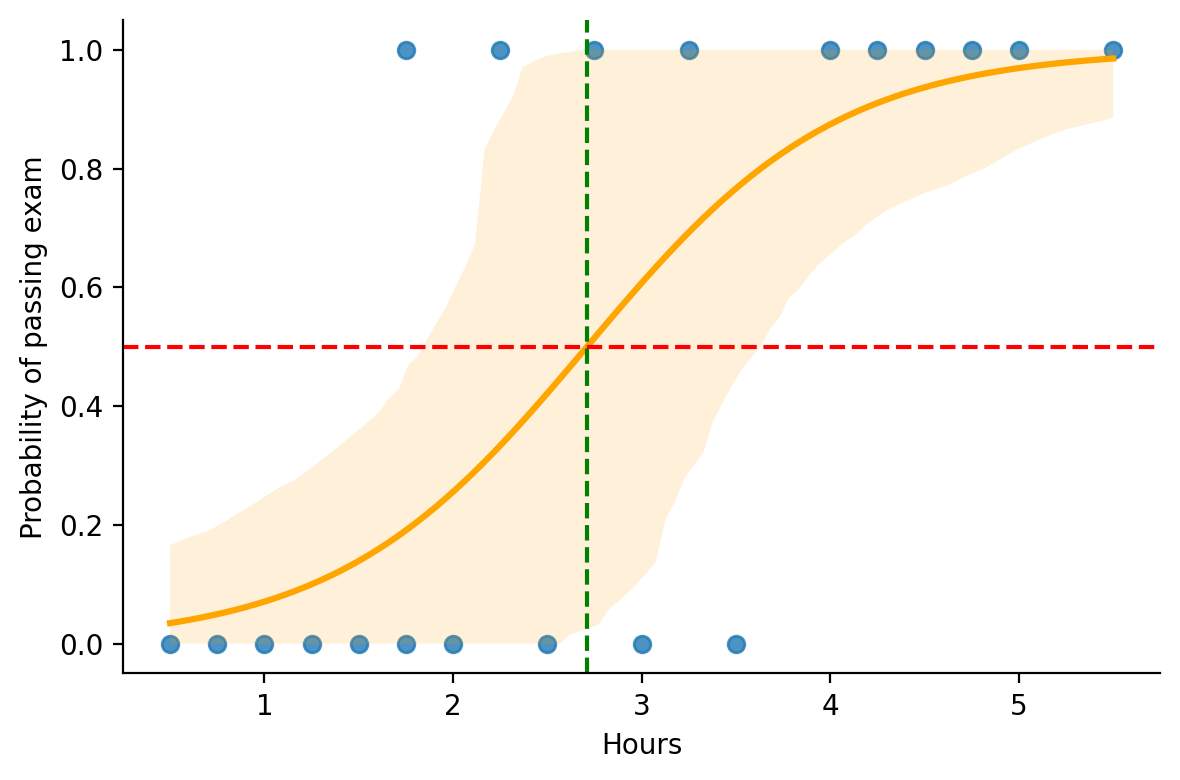

In [26]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--');

In [27]:
model.predict_proba(X)

array([[0.96528981, 0.03471019],
       [0.95022726, 0.04977274],
       [0.92910833, 0.07089167],
       [0.89997179, 0.10002821],
       [0.86065607, 0.13934393],
       [0.8091642 , 0.1908358 ],
       [0.8091642 , 0.1908358 ],
       [0.7442977 , 0.2557023 ],
       [0.6664708 , 0.3335292 ],
       [0.57837462, 0.42162538],
       [0.48499033, 0.51500967],
       [0.39264251, 0.60735749],
       [0.30738371, 0.69261629],
       [0.23352005, 0.76647995],
       [0.12555305, 0.87444695],
       [0.08972278, 0.91027722],
       [0.06337664, 0.93662336],
       [0.04438951, 0.95561049],
       [0.03090309, 0.96909691],
       [0.01480564, 0.98519436]])

In [29]:
model.predict_proba(X)[:, 0] # probability estimates from column 0 (negative)

array([0.96528981, 0.95022726, 0.92910833, 0.89997179, 0.86065607,
       0.8091642 , 0.8091642 , 0.7442977 , 0.6664708 , 0.57837462,
       0.48499033, 0.39264251, 0.30738371, 0.23352005, 0.12555305,
       0.08972278, 0.06337664, 0.04438951, 0.03090309, 0.01480564])

In [28]:
model.predict_proba(X)[:, 1] # probability estimates from column 1 (positive)

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

In [30]:
np.where(model.predict_proba(X)[:, 1] >= 0.01, 1, 0) # assign to 0 or 1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Play with threshold

- plot logistic regression with a given threshold

In [31]:
def sp(intercept, coef, x):
    '''
    logistic regression function (propability curve)
    '''
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

def solve(intercept, coef, threshold):
    '''
    หาค่า x ที่ตัดค่า prop (ที่ได้จากสมการ logistic regression) ณ threshold ที่กำหนด
    '''
    return (-np.log(1/threshold-1)-intercept) / coef

def precision(cfm):
    '''
    precision
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fp)

def tpr(cfm):
    '''
    true positive rate (recall)
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fn)

def fpr(cfm):
    '''
    false positive rate'''
    tn, fp, fn, tp = cfm.ravel()
    return fp / (fp + tn)

def cm(model, X, y, thres = .5):
    '''
    confusion matrix at a given threshold
    '''
    y_score = model.predict_proba(X)[:, 1]
    y_pred_tmp = np.where(y_score >= thres, 1, 0)
    return metrics.confusion_matrix(y, y_pred_tmp)

def plot_threshold(model, X, y, thres):
    '''
    plot logistic regression with a given threshold
    '''
    y_score = model.predict_proba(X)[:, 1]
    y_pred_tmp = np.where(y_score >= thres, 1, 0)
    cfm = cm(model, X, y, thres)
    
    xp = np.linspace(np.min(X), np.max(X), 30)
    yp = sp(model.intercept_, model.coef_, xp).ravel()
    plt.scatter(X, y, c = y_pred_tmp)
    plt.plot(xp, yp, color = 'lightblue')
    plt.axhline(thres, color = 'salmon', linestyle = '--')
    plt.axvline(solve(model.intercept_, model.coef_, thres), color = 'green', linestyle = '--')
    plt.title(f'threshold={thres:.2f}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}, prec = {precision(cfm):.2f}');
#     plt.savefig('lr2.svg')
    return plt

#### Threshold = 0.5

In [32]:
thres = .5
y_pred_t5 = np.where(model.predict_proba(X)[:, 1] >= thres, 1, 0)
# =IF(model.predict_proba(X)[:, 1]>=thres,1,0)
y_pred_t5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
y.values # convert pandas Series to numpy array

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [35]:
pd.crosstab(y, y_pred_t5)

col_0,0,1
Pass,,
0,8,2
1,2,8


In [36]:
cm(model, X, y, .5)

array([[8, 2],
       [2, 8]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


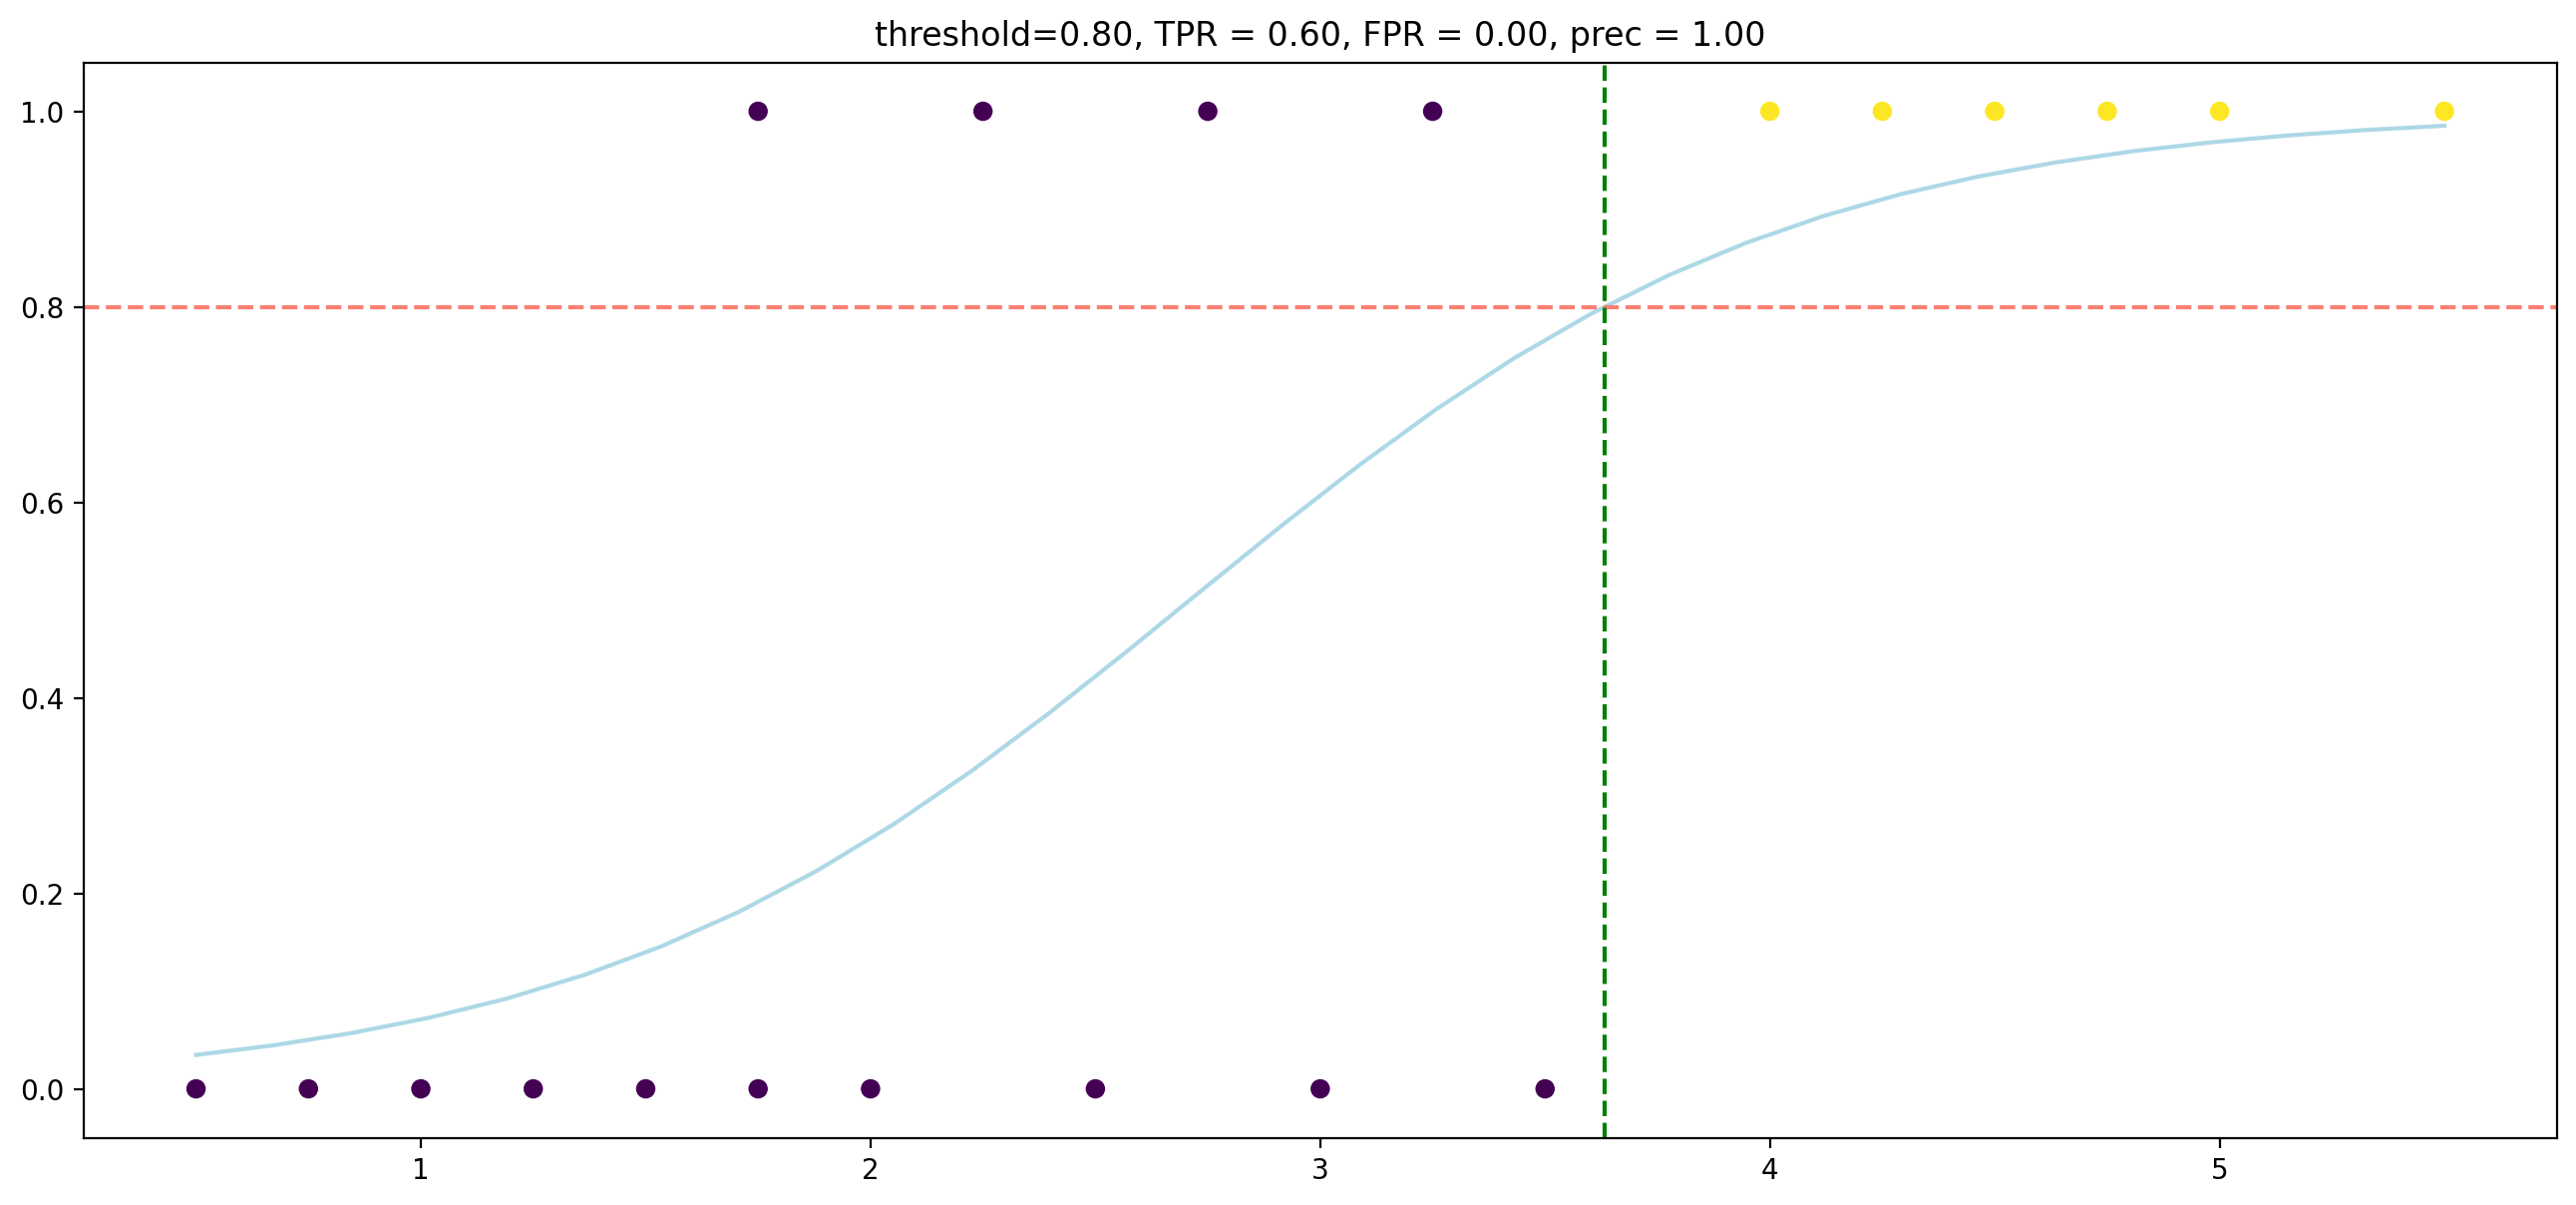

In [37]:
plt.figure(figsize = (16,7))

plot_threshold(model, X, y, thres = .8);